<h1 style ="font-family: Monospace; font-size: 49px">Biodiversity in National Parks</h1>

<p style="font-family: Times New Roman; font-size: 16px; line-height: 1.5; color: black;"><b>Project Summary:</b> In my 'Biodiversity in National Parks' project, I explored two datasets; although fictional, they both resembled real-world biodiversity data. I analyzed species distribution, conservation status, and park-specific observations over a 7-day period. Using Python and data manipulation tools like Pandas and Matplotlib, I addressed key questions. Despite the short data collection period and the lack of historical data, I provided clear answers. To enhance future analysis, including timestamps for observations and obtaining historical data beyond the 7-day period would create a more comprehensive dataset, improving the accuracy of predictive modeling and analysis.</p>

<h1 style ="font-family: Monospace; font-size: 35px">Stage 1: Import & Load</h1>

<p style="font-family: Times New Roman; font-size: 16px; line-height: 1.5; color: black;">Stage 1 involves two tasks: importing and loading. First, I imported essential libraries to facilitate data exploration, transformation, and visualization of the 'observations.csv' and 'species_info.csv'. Next, I loaded these files into dataframes, enabling the use of these libraries to achieve my project goals.</p>


<h2 style ="font-family: Monospace; font-size: 25px">1.1 Import</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns

<h2 style ="font-family: Monospace; font-size: 25px">1.2 Load</h2>

In [3]:
df_observations = pd.read_csv('observations.csv')
df_species_info = pd.read_csv('species_info.csv')

<h1 style ="font-family: Monospace; font-size: 35px">Stage 2: Explore</h1>

<p style="font-family: Times New Roman; font-size: 16px; line-height: 1.5; color: black;">In Stage 2, I dive into the exploration of the two datasets, df_observations and df_species_info, which were loaded in the previous stage. This exploration takes a sequential approach, starting with df_observations and then transitioning to df_species_info.</p>

<p style="font-family: Times New Roman; font-size: 16px; line-height: 1.5; color: black;">The primary aim of this exploration is to gain an understanding of each dataset's composition. This initial inspection involves gathering key information such as the dataset's dimensions (number of rows and columns), data types of each column, and the presence of missing data. Additionally, I generate concise summary statistics to identify any noteworthy numerical patterns or outliers. This comprehensive exploration sets the stage for more in-depth analysis in subsequent stages.</p>

<h2 style ="font-family: Monospace; font-size: 25px">2.1 Exploring: df_observations</h2>

<h3 style ="font-family: Monospace; font-size: 18px">2.1.1 Preview</h3>

In [4]:
df_observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


<h2 style ="font-family: Monospace; font-size: 15px">Initial Data Inspection:</h2>


<ol style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.5;">
    <li>Within the "df_observations" dataframe, the first column, labeled "scientific_name," exclusively contains the scientific name for a distinct species. To accurately reflect its content, this column is ideally suited for the 'string' data type.</li>
    <li>The second column, titled "park_name," consists of names of different national parks. Given that the contents are nominal variables, the most suitable data type for this column is 'string'.</li>
    <li>The last column in the dataset, "observations," represents the number of sightings of a particular species. Considering its nature as a discrete variable, the most appropriate data type for this column is 'integer'.</li>
</ol>


<h3 style ="font-family: Monospace; font-size: 18px">2.1.2 Summary Of Dataframe</h3>

In [5]:
df_observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


<h4 style ="font-family: Monospace; font-size: 15px">Key Take Aways From The DataFrame Summary:</h4>

<ol style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.5;">
    <li>There are 23,296 rows and 3 columns of data.</li>
    <li>Among the 23,296 rows examined, no null (missing) data has been found.</li>
    <li>The "scientific_name" and "observations" columns are currently assigned to the "object" data type. While 
        it is common for strings to fall under the "object" type, I plan to convert these columns to the "string" data type during the transformation phase.</li>
</ol>


In [6]:
df_observations.describe(include = 'all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [7]:
# Checking For All The Unique Park Names.
df_observations['park_name'].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

<h4 style ="font-family: Monospace; font-size: 15px">Summary Statistics Observations:</h4>

<ol style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.5;">
    <li>The "scientific_name" column contains a total of 5,541 distinct scientific names.</li>
    <li>In the "park_name" column, there are exclusively four unique park names, signifying the representation of data across four distinct national parks.</li>
    <li>Within the "observations" column, the range extends from a minimum of 9 observations for an individual species to a maximum of 321, offering valuable insights into the diversity of observation counts.</li>
</ol>


<h4 style ="font-family: Monospace; font-size: 15px">Note:</h4>

<p style="font-family: Times New Roman; font-size: 16px; line-height: 1.5; color: black;">I would like to mention that although I performed a check for duplicates and identified a total of 15 duplicates, I have chosen not to display all these duplicate entries, nor have I removed any of them from the dataset. This decision is based on the fact that the data was collected from each park over a 7-day period. It is entirely possible that a species in the same park could receive the same number of observations on different days. Since there are no date records provided in the dataset, it is uncertain whether the data is truly duplicated or not. Therefore, I have opted to keep the data without removal.</p>


<h2 style ="font-family: Monospace; font-size: 25px">2.2 Exploring: df_species_info</h2>

<h3 style ="font-family: Monospace; font-size: 18px">2.2.1 Preview</h3>

In [8]:
df_species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [9]:
df_species_info['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [10]:
df_species_info['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

<h2 style ="font-family: Monospace; font-size: 15px">Initial Data Inspection:</h2>

<ol style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.5;">
    <li>The "category" column within the "df_species_info" dataframe encompasses seven distinct animal classifications. As "category" pertains to nominal variables, a type of categorical variable, the appropriate data type to assign is a string.</li>
    <li>Much like the "df_observations" dataframe, the "df_species_info" dataframe incorporates a "scientific_name" column housing the scientific name for each animal. The ideal data type for this column is a string.</li>
    <li>The column "common_names" contains alternative titles commonly attributed to a species, distinct from its scientific name. To appropriately capture this information, the "common_names" column should be assigned a data type of string.</li>
    <li>In the initial preview involving the first five rows of the "df_species_info" dataframe, the sole apparent value within the "conservation_status" column is "NaN" (representing missing data). However, upon closer examination, I found that this column consists of a variety of statuses, including 'Species of Concern', 'Endangered', 'Threatened', and 'In Recovery'. These statuses indicate differing levels of conservation concern for each species. For this column, the string data type will be assigned.</li>
</ol>

<h3 style ="font-family: Monospace; font-size: 18px">2.2.2 Summary Of Dataframe</h3>

In [11]:
df_species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


<h4 style ="font-family: Monospace; font-size: 15px">Key Take Aways From The DataFrame Summary:</h4>

<ol style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.5;">
    <li>The dataset encompasses 5824 rows and 4 columns of data.</li>
    <li>Columns 'category', 'scientific_name', and 'common_names' have no null (missing) data.</li>
    <li>In contrast, the 'conservation_status' column is missing 5633 values.</li>
    <li>Lastly, all columns are assigned to the 'object' data type; this assignment will be subject to alteration during the transformation stage.</li>
</ol>

In [12]:
df_species_info.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [13]:
# Checking For Number Of Duplicate Rows
df_species_info.duplicated().sum()

0

<h4 style ="font-family: Monospace; font-size: 15px">Summary Statistics Observations:</h4>

<ul style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.5;">
    <li>The count of unique values in the scientific_name column of the "df_species_info" dataframe (5,541) is the same as the unique scientific names in the "df_observations" dataframe. Although this alignment doesn't definitively establish identical entries in both columns, it does offer a promising indicator that both datasets likely pertain to the same species. In the subsequent transformation stage, a comparison of these unique scientific names will be conducted. If these names exhibit similarities, it will streamline the process of merging data from both data sets and facilitate the creation of sub dataframes, incorporating select columns.</li>
    <li>No duplicate rows have been detected, yet the "scientific_names" column contains 283 instances of duplicated values. It's important to note that pandas has identified no repetitive rows, and given that scientific names serve as unique identifiers for individual animals, the implication is that the spreadsheet's creator potentially entered the same species multiple times while providing different information in one or more columns.In the upcoming inspection, I will identify the column where scientific names appear more than once without being flagged as duplicates.</li>
    <li>The "common_names" column contains duplicates, but this is not a concern because common names are not unique and can be shared by multiple species.</li>
</ul>


<h3 style ="font-family: Monospace; font-size: 18px">2.2.3 Further Inspection</h3>

In [14]:
# I created this dataframe just for the sole purpose of viewing a list of a few duplicate
# scientific names so I could further look into them and find the issue.
df_preview_dups = df_species_info[df_species_info.duplicated('scientific_name')]
df_preview_dups.head(10)

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
3028,Mammal,Mustela vison,"American Mink, Mink",NaN
3030,Mammal,Procyon lotor,"Common Raccoon, Northern Raccoon, Raccoon",NaN
3031,Mammal,Ursus americanus,"American Black Bear, Black Bear",NaN
3035,Mammal,Eptesicus fuscus,"Big Brown Bat, Big Brown Bat",Species of Concern
3037,Mammal,Lasionycteris noctivagans,"Silver-Haired Bat, Silver-Haired Bat",Species of Concern


In [15]:
# (1) Using one of the scientific names in the dataframe above, which is holding all duplicates, I am going to
# further inspect to see which columns are incorporating mismatched data
df_species_info.loc[df_species_info['scientific_name'] == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [16]:
# (2) Using one of the scientific names in the dataframe above, which is holding all duplicates, I am going to
# further inspect to see which columns are incorporating mismatched data

df_species_info.loc[df_species_info['scientific_name'] == 'Myotis lucifugus']

,category,scientific_name,common_names,conservation_status
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern
3042,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern
4467,Mammal,Myotis lucifugus,Little Brown Myotis,Species of Concern


<h4 style ="font-family: Monospace; font-size: 15px">Observation Notes:</h4>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">Before addressing the main challenge, I conducted a thorough analysis of duplicate entries in the 'scientific_names' category. To do this, I selected a subset of four species names identified as duplicates within the 'scientific_names' column. For clarity, I chose to display only two as examples, excluding the other two to prevent notebook overload. Using the .loc property, I examined each row associated with the specific scientific name under investigation. This approach revealed that the 'common_names' and 'conservation_status' columns were the culprits behind the absence of complete duplicate rows. In most cases, the 'common_names' differed slightly (though not identically) among duplicates, and in other instances, the conservation status varied among duplicates.</p>

<h1 style ="font-family: Monospace; font-size: 33px">Stage 3: Transform</h1>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">In Stage 3 of this project, the focus is on data transformation. Any data issues identified during the exploration stage will be addressed here. Similar to the previous stage, separate treatment for each dataset will be maintained for clarity.</p>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">For the df_observations dataframe, the data types of the 'scientific_name' and 'park_name' columns will be modified from object to string, aligning them with the most appropriate data type.</p>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">Moving on to the 'df_species_info' dataframe, during the exploration stage, duplicates were identified in the 'scientific_name' column. However, duplicate rows weren't detected due to variations in other columns. These differences mainly arose from variations in 'common_names,' and in some cases, the 'conservation_status' column had differing values. The goal is to address these inconsistencies and then handle any missing data. Finally, all data types will be standardized to string for consistency.</p>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">This stage ensures that the data is well-prepared for subsequent analysis while maintaining clarity and organization throughout the process.</p>



<h2 style ="font-family: Monospace; font-size: 25px">3.1 Data Cleaning: df_observations</h2>

<h3 style ="font-family: Monospace; font-size: 18px">3.1.1 Data Types</h3>

In [35]:
columns_to_convert_One = ['scientific_name','park_name']
# Convert
df_observations[columns_to_convert_One] = df_observations[columns_to_convert_One].astype('string')

In [36]:
# Check
df_observations.dtypes

scientific_name    string[python]
park_name          string[python]
observations                int64
dtype: object

<h2 style ="font-family: Monospace; font-size: 25px">3.2 Data Cleaning: df_species_info </h2>

<h3 style ="font-family: Monospace; font-size: 18px">3.2.1 Handling Duplicates</h3>

In [19]:
# Created a new dataframe to address the duplicate of scientific name issue.

species_info_df = df_species_info.groupby('scientific_name').agg({
    'category': 'first',
    'common_names': 'last',
    'conservation_status': 'last'
}).reset_index()

In [20]:
# Change The Order Of The Columns.
order = ['category','scientific_name','common_names','conservation_status']
species_info_df = species_info_df[order]

In [37]:
# Check Using A Sample
species_info_df.loc[species_info_df['scientific_name'] == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
804,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [22]:
# Check Changes
species_info_df.describe()

,category,scientific_name,common_names,conservation_status
count,5541,5541,5541,179
unique,7,5541,5231,4
top,Vascular Plant,Abies bifolia,Brachythecium Moss,Species of Concern
freq,4262,1,7,151


<h3 style ="font-family: Monospace; font-size: 18px">3.2.2 Handling Missing Data</h3>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">Now that we have an improved dataframe called species_info_df, which doesn't have any duplicate entries, I will handle missing data in the conservation_status column by labeling species without an assigned conservation status as 'Not Evaluated.'</p>

In [43]:
# Replace NaN Values With 'Not Evaluated'
species_info_df.fillna('Not Evaluated', inplace=True) #inplace=True allows you to edit an existing df without creating a new one.

In [44]:
# Check
species_info_df['conservation_status'].unique()

<StringArray>
[     'Not Evaluated', 'Species of Concern',         'Threatened',
         'Endangered',        'In Recovery']
Length: 5, dtype: string

<h3 style ="font-family: Monospace; font-size: 18px">3.2.3 Data Types</h3>

In [45]:
# Changing All Data Types To String

columns_to_convert_Two = ['category', 'scientific_name','common_names', 'conservation_status']

species_info_df[columns_to_convert_Two] = species_info_df[columns_to_convert_Two].astype('string')

In [26]:
# Checking
species_info_df.dtypes

category               string[python]
scientific_name        string[python]
common_names           string[python]
conservation_status    string[python]
dtype: object

<h1 style ="font-family: Monospace; font-size: 33px">Stage 4: Analysis</h1>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">In Stage 4, following data exploration and preparation, I leverage Matplotlib and Seaborn for visual analysis. These tools facilitate a deeper understanding of the dataset, aiding in the pursuit of project objectives:</p>

<ul style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.5;">
    <li><b>Distribution of Species Categories:</b> Analyzed the distribution of species categories (Mammal, Bird, Reptile, etc.) in the dataset.</li>
  <li><b>Conservation Status Breakdown:</b> Investigated the number of species falling under each conservation status category.</li>
  <li><b>Park Observations Comparison:</b> Compared the total number of observations across different parks to identify variations.</li>
  <li><b>Conservation Status Breakdown (Excluding 'Not Evaluated'):</b> Presented a comprehensive breakdown of species across different conservation status categories, excluding 'Not Evaluated.'</li>
  <li><b>Most Common Conservation Status by Category:</b> Identified the most prevalent conservation status for each species category, shedding light on conservation challenges.</li>
</ul>

<h2 style ="font-family: Monospace; font-size: 25px">4.1 Distribution of Species Categories</h2>

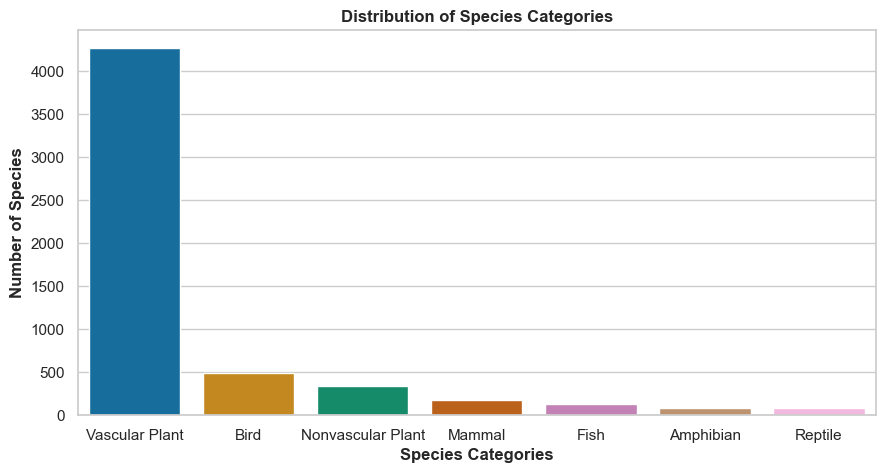

In [27]:
category_counts = species_info_df['category'].value_counts()

sns.set(style='whitegrid')
plt.figure(figsize=(10.3, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette= 'colorblind')
plt.title('Distribution of Species Categories', fontweight='bold')
plt.xlabel('Species Categories', fontweight='bold')
plt.ylabel('Number of Species', fontweight='bold')

plt.show()

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">The visualization vividly illustrates the distribution of species categories within the dataset. Vascular Plants take the lead with the highest number of observations, closely followed by Birds, making them the second most represented category. On the other hand, Amphibians and Reptiles exhibit the fewest observations, reflecting their lower presence in the dataset.</p> 

<h2 style ="font-family: Monospace; font-size: 25px">4.2 Conservation Status Breakdown:</h2>

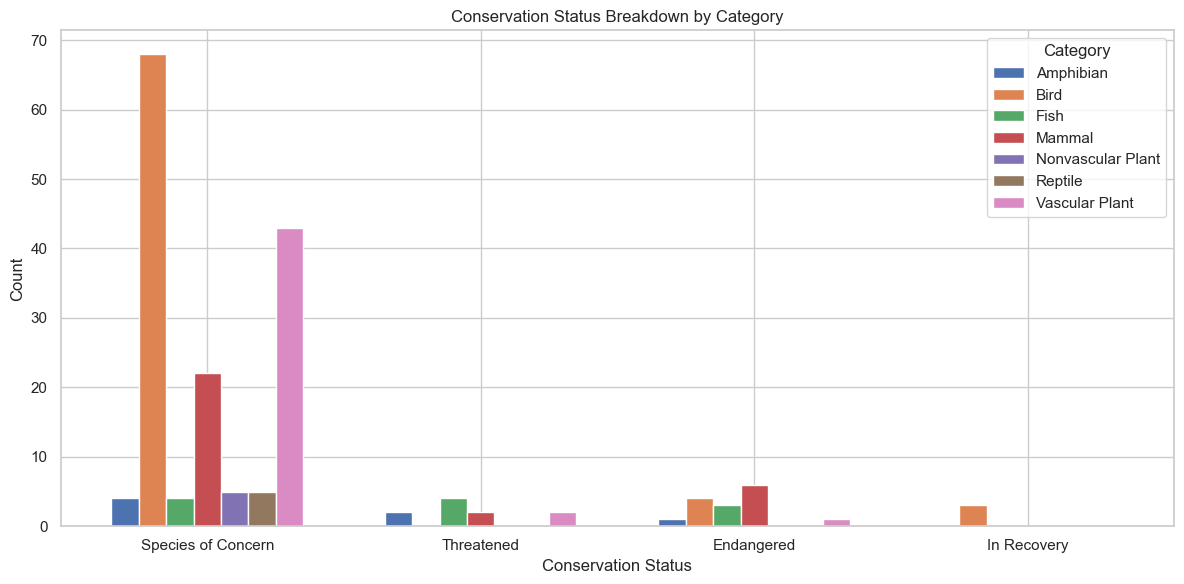

In [28]:
# Filter the DataFrame to exclude 'Not Evaluated' status
filtered_status_df = species_info_df[species_info_df['conservation_status'] != 'Not Evaluated']

#Defining the order of the statuses
filtered_status_order = ['Species of Concern', 'Threatened', 'Endangered', 'In Recovery']

# Resetting categories and order using .loc[]
filtered_status_df.loc[:, 'conservation_status'] = filtered_status_df['conservation_status'].astype(
    pd.CategoricalDtype(categories=filtered_status_order, ordered=True)
)

grouped_data = filtered_status_df.groupby(['conservation_status', 'category']).size().unstack(fill_value=0)

# Extract conservation status names and category names
statuses = grouped_data.index
categories = grouped_data.columns

# Create positions for the bars
x = np.arange(len(statuses))

# Define the width of the bars
bar_width = 0.1

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
for i, category in enumerate(categories):
    plt.bar(x + i * bar_width, grouped_data[category], width=bar_width, label=category)

plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Conservation Status Breakdown by Category')
plt.xticks(x + bar_width * (len(categories) - 1) / 2, statuses)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">Among the various categories, Birds stand out with the highest count in the 'Species Of Concern' conservation status category, closely followed by Vascular Plants. On the other hand, Fish exhibits the lowest count of species in this conservation status.</p>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">In the 'Threatened' conservation status category, Fish leads with the highest number of species, whereas Mammals take the lead in the 'endangered' category, with Birds following closely behind.</p>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">Interestingly, Birds are the sole category represented in the 'in Recovery' conservation status. This summary provides a clear overview of how different species categories are distributed among conservation statuses.</p>

<h2 style ="font-family: Monospace; font-size: 25px">4.3 Park Observations Comparison</h2>

In [29]:
species_observations_df = df_observations.merge(species_info_df, how = 'inner', on = 'scientific_name')
species_observations_df = species_observations_df.drop(columns = 'common_names')

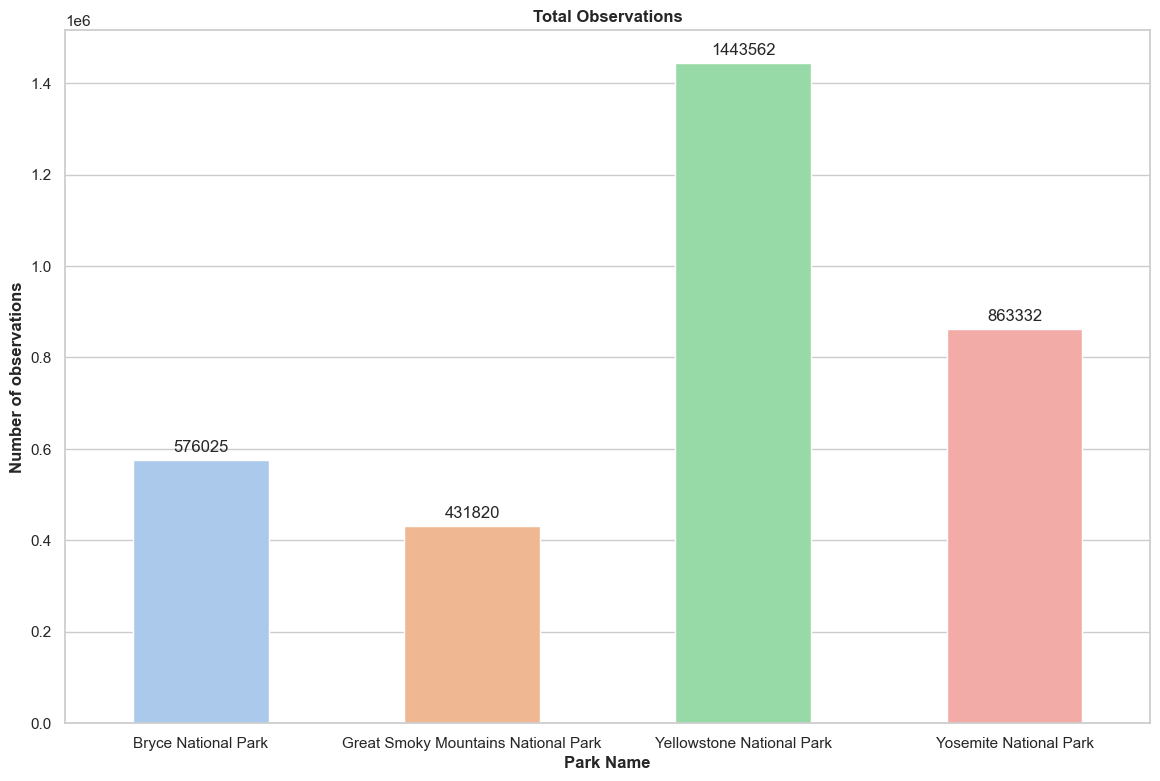

In [30]:
total_observations_per_park = species_observations_df.groupby('park_name')['observations'].sum().reset_index()

sns.set(style='whitegrid')
plt.figure(figsize=(14, 9))
ax = sns.barplot(x='park_name', y='observations', data=total_observations_per_park, palette='pastel', width=0.5)
plt.title('Total Observations', fontweight='bold')
plt.xlabel('Park Name', fontweight='bold')
plt.ylabel('Number of observations', fontweight='bold')

# Adding integer labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">Using the visualization, I conducted a comprehensive comparison of the total number of observations across various parks. The goal was to identify any significant disparities and answer the question: Are certain parks recording a higher number of observations than others?</p>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">The findings clearly indicate that the total number of observations is not evenly distributed among the parks. Specifically, Yellowstone National Park emerges with the highest number of observations, totaling an impressive 1,443,562 recorded observations. In stark contrast, Great Smoky Mountains National Park records the lowest number of observations, with a count of 431,820.</p>

<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">These visual insights offer a compelling glimpse into the varying levels of observation activity across different parks, shedding light on the parks where observations are more prominent.</p>

<h2 style ="font-family: Monospace; font-size: 25px">4.4 Species Diversity by Park</h2>

In [31]:
sum_observations = species_observations_df.groupby(['park_name', 'category'])['observations'].sum()

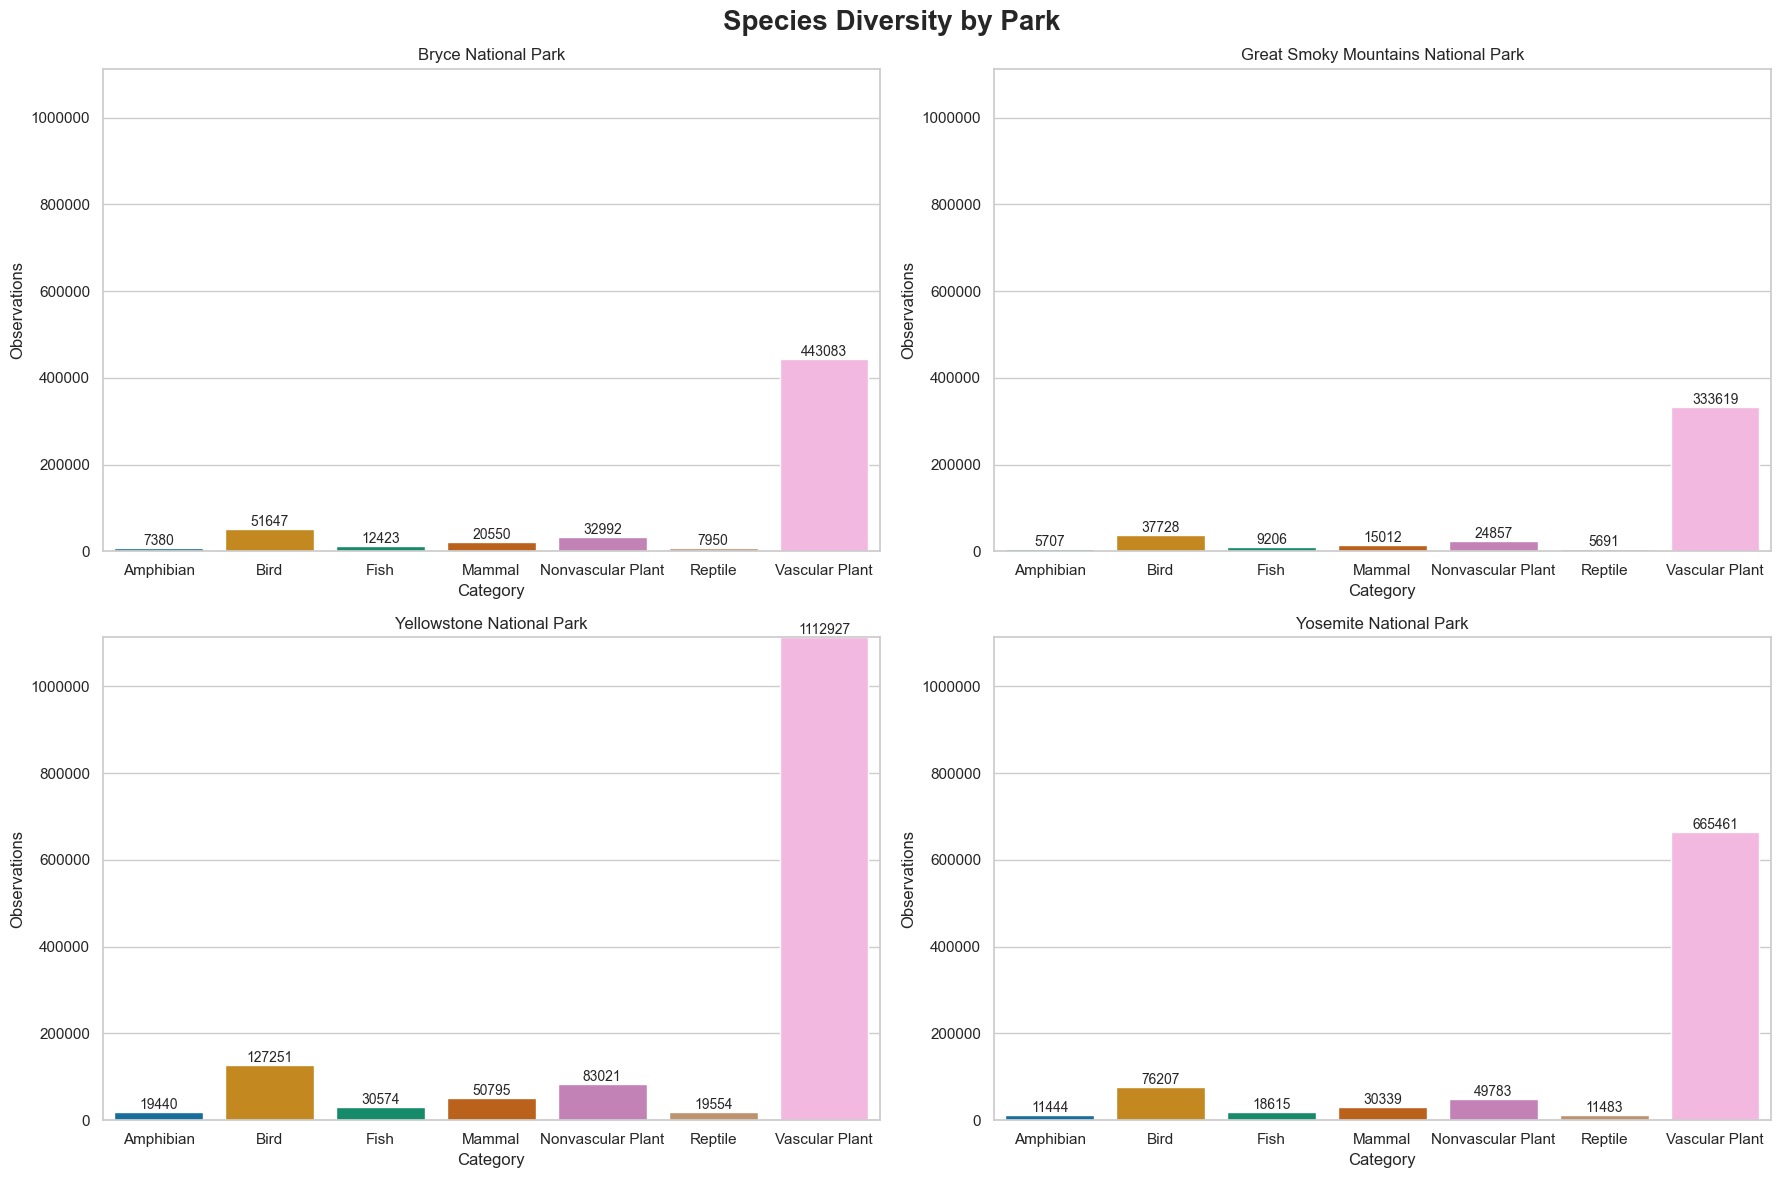

In [32]:
# Set the color palette to "colorblind"
sns.set_palette("colorblind")

# Convert the sum_observations dictionary to a DataFrame
sum_observations_df = pd.DataFrame(list(sum_observations.items()), columns=['Park_Category', 'Observations'])

# Split the 'Park_Category' column into two separate columns
sum_observations_df[['Park', 'Category']] = pd.DataFrame(sum_observations_df['Park_Category'].tolist(), index=sum_observations_df.index)
sum_observations_df.drop(columns='Park_Category', inplace=True)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Define a function to format y-axis tick labels as integers
def format_func(value, tick_number):
    return int(value)

# Iterate through each park and create a barplot in the corresponding subplot
parks = sum_observations_df['Park'].unique()
max_observation = sum_observations_df['Observations'].max()  # Find the maximum observation count
for park, ax in zip(parks, axes.flatten()):
    park_data = sum_observations_df[sum_observations_df['Park'] == park]
    sns.barplot(x='Category', y='Observations', data=park_data, ax=ax)
    ax.set_title(park)
    ax.set_xlabel('Category')
    ax.set_ylabel('Observations')
    ax.set_ylim(0, max_observation)  # Set y-axis limits
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))  # Format y-axis tick labels as integers
    
    # Add count labels to each bar
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height()):d}', 
                ha='center', va='bottom', fontsize=10)

# Add title to the entire figure
fig.suptitle('Species Diversity by Park', fontsize=20, fontweight='bold')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



<p style ="font-family: Noto Sans; font-weight: 200; font-size: 16px; line-height: 200%">Below, I have included a table titled "Observation Heatmap." The heatmap displayed below offers additional insights into the distribution of observations, aiding in the identification of specific hotspots of biodiversity within each park. This heatmap can be particularly helpful for viewers as it simplifies the process of spotting areas with high or low observation counts, making patterns more discernible.</p>

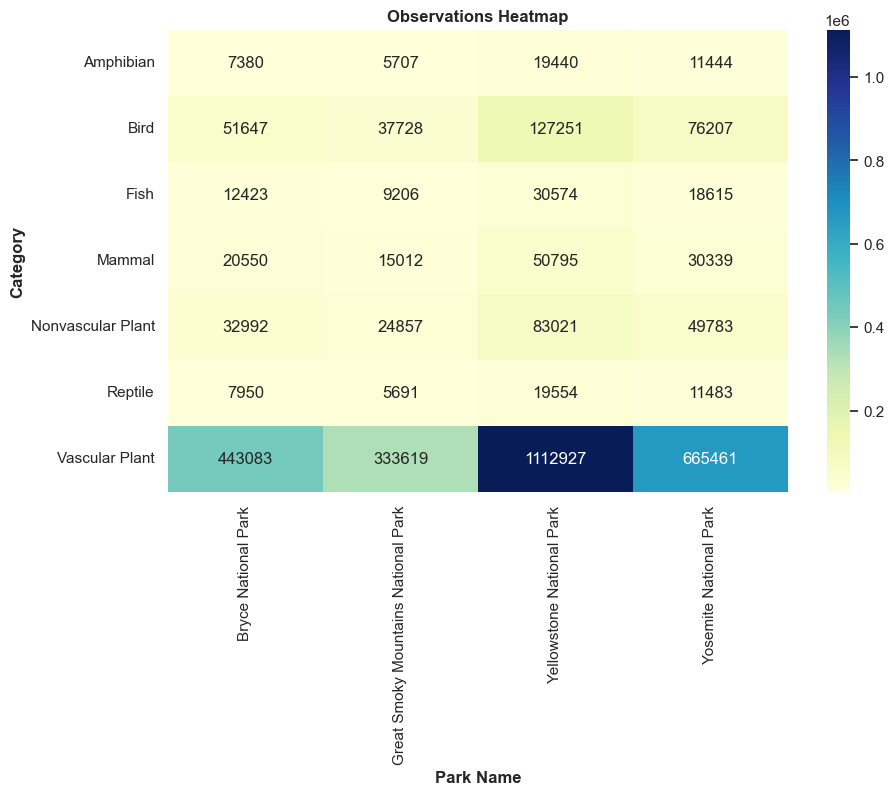

In [33]:
# Pivot the data to create a matrix for the heatmap
observations_heatmap_data = species_observations_df.pivot_table(index='category', columns='park_name', values='observations', aggfunc='sum')

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(observations_heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Observations Heatmap', fontweight='bold')
plt.xlabel('Park Name', fontweight='bold')
plt.ylabel('Category', fontweight='bold')
plt.show()

### Species Diversity by Park Analysis

1. **Biodiversity by Park:**
   - **Yellowstone National Park** appears to have the highest biodiversity, as it records the highest number of observations across all categories. This park stands out with notably higher counts for birds and vascular plants.
   - **Bryce National Park** and **Yosemite National Park** also show substantial biodiversity, particularly in the vascular plant category.

2. **Category Insights:**
   - In all parks, the category with the highest number of observations is **"Vascular Plant."** This suggests that plant life is well-documented and abundant in these parks.
   - For animals, **"Birds"** seem to be the most frequently observed category across all parks, indicating a significant presence of bird species in these natural settings.
   - **"Mammals"** also have a substantial presence, especially in Yellowstone and Bryce National Parks.

3. **Park Comparisons:**
   - **Great Smoky Mountains National Park** stands out for having a diverse range of observations across different categories, despite not having the highest overall counts. This park offers a balanced representation of various species.

4. **Patterns of Interest:**
   - The count of observations in the **"Fish"** category is relatively low compared to other categories in all parks, suggesting that fish species may be less frequently observed or studied in these parks.

5. **Consistency Across Parks:**
   - There is a certain level of consistency in the distribution of observations across the categories, with each park following a similar pattern. This consistency might reflect the natural biodiversity patterns in these parks.

Overall, this data indicates that each park has a unique biodiversity profile, with Yellowstone National Park leading in terms of the sheer number of observations across various categories, while Great Smoky Mountains National Park offers a balanced diversity of species. This analysis can inform conservation efforts and further research into the ecosystems of these national parks.

